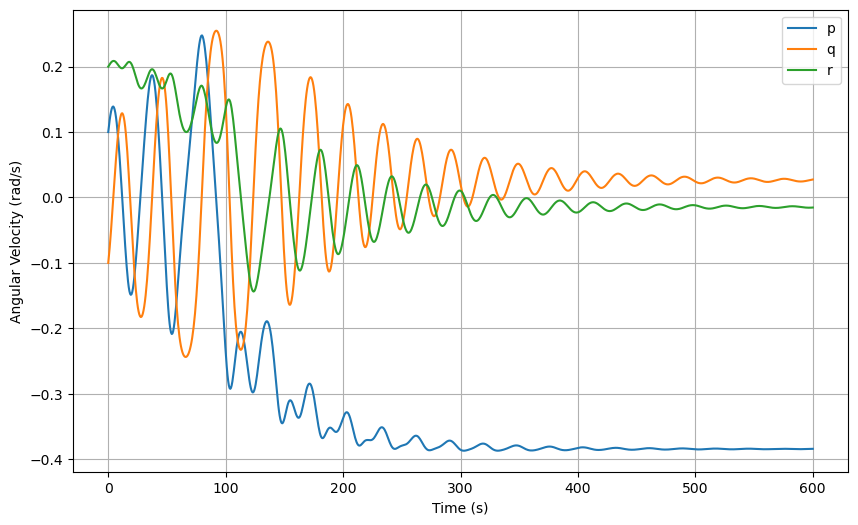

In [14]:
'''
The dynamics of spacecraft play a crucial role in their control and maneuvering. 
Understanding how a spacecraft's angular velocity evolves over time is essential 
for designing effective control systems. In this project, 
we have developed a numerical model to simulate the dynamics of a spacecraft 
and visualize its angular velocity using Python.
'''
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
Ixx = 1.0  # Moment of inertia about x-axis
Iyy = 2.0  # Moment of inertia about y-axis
Izz = 3.0  # Moment of inertia about z-axis

# Initial conditions
omega0 = np.array([0.1, -0.1, 0.2])  # Initial angular velocity in rad/s

# Magnetic field vector (assumed constant)
B = np.array([0.707, 0.707, 0.707])  # Magnetic field along the z-axis

# Function defining the spacecraft dynamics
def spacecraft_dynamics(t, omega):
    '''
    The control torque due to the magnetic field:
    torque=ω×K×(ω×B)
    where ω represents the angular velocity of the spacecraft, K is the control gain, and B is the magnetic field vector.
    '''
    # Compute the control torque due to the magnetic field
    K = 0.1  # Control gain
    torque = np.cross(omega, K * np.cross(omega, B))
    
    # Compute the derivatives of the angular velocity
    p_dot = (Iyy - Izz) / Ixx * omega[1] * omega[2] + torque[0] / Ixx
    q_dot = (Izz - Ixx) / Iyy * omega[0] * omega[2] + torque[1] / Iyy
    r_dot = (Ixx - Iyy) / Izz * omega[0] * omega[1] + torque[2] / Izz
    '''
    where p, q, and r are the components of the angular velocity along the x, y, and z axes, respectively.
    '''
    
    return [p_dot, q_dot, r_dot]

# Solve the differential equations numerically
sol = solve_ivp(spacecraft_dynamics, [0, 600], omega0, t_eval=np.linspace(0, 600, 1000))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='p')
plt.plot(sol.t, sol.y[1], label='q')
plt.plot(sol.t, sol.y[2], label='r')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.grid(True)
plt.show()